In [9]:
import networkx as nx
import matplotlib as plt
import numpy as np

In [10]:

#The Recursive Largest First Strategy is a heuristic of the greedy algorithm
#this Function is designed to integrate with the networkx greedy_color method as 
#a strategy for ordering the nodes.
#nx.greedy_color(graph, RLFStrategy)
def RLFStrategy(graph,colors = {}):
    #The list that we will return with order of nodes to be colored
    result = []
    
    
    #1. The First node added is the one with the highest degree of neighbors
    high = -1
    topNode = None
    for node in graph.__iter__():
        if graph.degree(node) > high:
            topNode = node
            high = graph.degree(node)
    result.append(topNode)   
     
        
        
    #2.Subsequent nodes are added as follows
    while len(result) < graph.number_of_nodes(): 
        
        
        # a) not adjacent to any vertex in result
        adjdict = {}
        #adjdict.keys() will contain all of the nodes adjacent to those in
        for node in result:
            adjdict.update(graph.__getitem__(node))
        notadj = []
        for node in graph.__iter__():
            if (adjdict.get(node) is None) and (node not in result):
                notadj.append(node)
        #if notadj has none then we need to put all the uncolored vertices in
        if notadj == []:
            for node in graph.__iter__():
                if node not in result:
                    notadj.append(node)
        
        
        #b) have maximal number of neighbors that are adjacent to vertices in result
        pairings ={}
        for node in notadj:
            adjacents = graph.__getitem__(node)
            count = 0
            for adj in adjacents: 
                if adj in result:
                    count+= 1   
                    
                    
            # i) ties are decided by choosing the vertex with the minimal number of neighbors not in result
            if pairings.get(count) is not None:
                a = graph.degree(pairings[count])-count
                b = graph.degree(node)-count
                if a < b:
                    pairings.update({count:node}) 
                 # else do nothing
            else:   
                pairings.update({count:node})   

        result.append(pairings[max(pairings)])
        
    return result
       

In [11]:
def num_of_colors(graph, strategy):
    return max(nx.greedy_color(graph, strategy).values())

Here we need to collect the data on the number of colors that each strategy outputs given the graph. Each graph will have 100 nodes and the number of edges will be the independent variable.

In [12]:
def data_collection():
    NUM_OF_TRIALS = 50
    x_vars = [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]
    RLF_data = []
    greedy_data = []
    DSATUR_data = []
    for x in x_vars:
        RLF = []
        greedy = []
        DSATUR = []
        
        for i in range(NUM_OF_TRIALS):
            
            g = nx.gnm_random_graph(100,x)
            
            RLF.append(num_of_colors(g, RLFStrategy))
            greedy.append(num_of_colors(g, 'random_sequential'))
            DSATUR.append(num_of_colors(g, 'DSATUR'))
            
            
        RLF_data.append(sum(RLF)/len(RLF))
        DSATUR_data.append(sum(DSATUR)/len(DSATUR))
        greedy_data.append(sum(greedy)/len(greedy))
        
        
    return (x_vars, RLF_data, greedy_data, DSATUR_data)
            
        

Hypothesis: RLF will out preform the other algorithms because it considers the highest number of factors when ordering the nodes to be colored.

In [13]:
import matplotlib.pyplot as plt

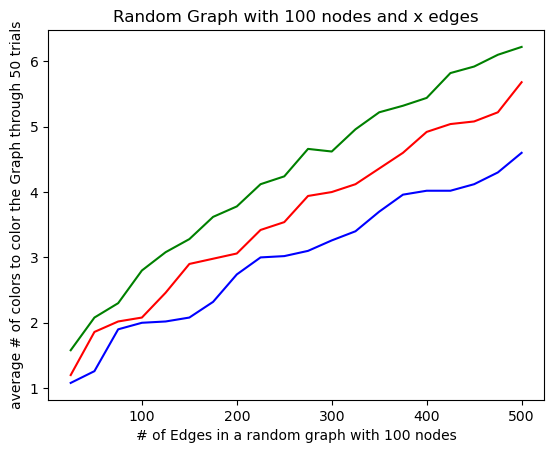

In [14]:



x_vars, RLF, greedy, DSATUR =  data_collection()

plt.plot(x_vars, RLF, 'red')
plt.plot(x_vars, DSATUR, 'blue')
plt.plot(x_vars, greedy, 'green')
    

     

plt.ylabel('average # of colors to color the Graph through 50 trials')
plt.xlabel('# of Edges in a random graph with 100 nodes')
plt.title('Random Graph with 100 nodes and x edges')
    
plt.show()

Reflection: This results from this experiment demonstrate that DSATUR is the best performing algorithm out of the 3 on randomly generated graphs. This goes against my hypothesis that RLF would outpreform the other algorithms. This makes DSATUR the clearly favorable algorithm because it is faster than RLF and preforms better colorings.